<a href="https://colab.research.google.com/github/qkrwnsgml0393-dev/Statistic/blob/main/Week02_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%ED%8F%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
from google.colab import files
uploaded = files.upload()

Saving KS_NFA_FTNESS_MESURE_ITEM_MESURE_INFO_202401.csv to KS_NFA_FTNESS_MESURE_ITEM_MESURE_INFO_202401 (3).csv


In [49]:
df = pd.read_csv('KS_NFA_FTNESS_MESURE_ITEM_MESURE_INFO_202401.csv')
df.head()

,MESURE_TME,CNTER_NM,AGE_FLAG_NM,MESURE_PLACE_FLAG_NM,MESURE_AGE_CO,INPT_FLAG_NM,COAW_FLAG_NM,MESURE_DAY,SEXDSTN_FLAG_CD,MESURE_IEM_001_VALUE,...,MESURE_IEM_038_VALUE,MESURE_IEM_039_VALUE,MESURE_IEM_040_VALUE,MESURE_IEM_041_VALUE,MESURE_IEM_042_VALUE,MESURE_IEM_043_VALUE,MESURE_IEM_044_VALUE,MESURE_IEM_050_VALUE,MESURE_IEM_051_VALUE,MESURE_IEM_052_VALUE
0,3,동구(부산),어르신,일반,68,관리자,참가,20240102,M,176.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.8
1,2,스포원(금정),성인,일반,27,관리자,3등급,20240102,F,164.6,...,NaN,NaN,0.393,0.438,NaN,NaN,NaN,NaN,NaN,NaN
2,1,사상,성인,일반,19,관리자,참가,20240102,M,173.5,...,NaN,NaN,0.312,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,KSPO송파,성인,일반,58,관리자,참가,20240102,M,166.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,포천,성인,일반,54,관리자,3등급,20240102,F,149.3,...,NaN,NaN,0.340,0.470,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df_selected = df.iloc[:,[8,9,10,11,13,14,38,39,40,41,42]].dropna()
df_selected.head()

,SEXDSTN_FLAG_CD,MESURE_IEM_001_VALUE,MESURE_IEM_002_VALUE,MESURE_IEM_003_VALUE,MESURE_IEM_005_VALUE,MESURE_IEM_006_VALUE,MESURE_IEM_031_VALUE,MESURE_IEM_032_VALUE,MESURE_IEM_033_VALUE,MESURE_IEM_034_VALUE,MESURE_IEM_035_VALUE
3,M,166.1,69.9,22.9,97.0,159.0,99.0,126.0,145.0,173.0,33.8
26,M,180.6,70.7,13.0,68.0,125.0,69.0,94.0,117.0,150.0,49.5
31,M,178.6,78.8,21.9,92.0,134.0,67.0,126.0,149.0,177.0,43.5
32,M,173.0,66.1,13.7,68.0,117.0,80.0,109.0,134.0,172.0,45.8
39,M,176.3,75.1,13.1,48.0,101.0,90.0,110.0,124.0,153.0,47.9


In [51]:
df_selected.columns = [
    'sex',
    'hight',
    'weight',
    'fatrate',
    'diastolic_bp',
    'systolic_bp',
    'tmil_stable',
    'tmil_3m',
    'tmil_6m',
    'tmil_9m',
    'tmil_vo2M',
]

<Axes: >

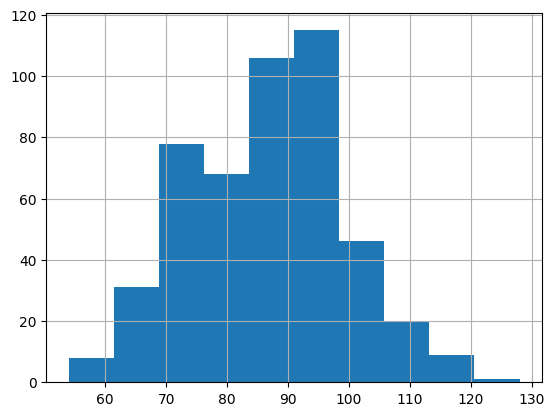

In [52]:
df_selected['tmil_stable'].hist()

In [53]:
df_selected['tmil_stable'].skew()

np.float64(0.01227969611363327)

In [54]:
df_selected['tmil_stable'].kurt()

np.float64(-0.14529448754316077)

In [55]:
df_selected['tmil_stable'].describe()

,tmil_stable
count,482.000000
mean,86.493776
std,12.563724
min,54.000000
25%,77.250000
50%,87.000000
75%,95.000000
max,128.000000


In [56]:
df_selected['tmil_stable'].quantile([0.25,0.5,0.75])

,tmil_stable
0.25,77.25
0.50,87.00
0.75,95.00


"skew와 kurt를 비교한 결과 정규분포와 유한한 것처럼 보인다. 하지만 실제 분포는 평균 이하 구간(87이하)에 상대적으로 더 많은 데이터가 분포하고, 최빈 구간은 90~100근처에 집중되어 있다. 따라서 정규성 가정이 크게 깨지지 않으나, 중앙 근처의 비대칭성은 해석 시 주의가 필요하다"

따하서 Q-Q Plot으로 정규성을 확인해보고자 한다.

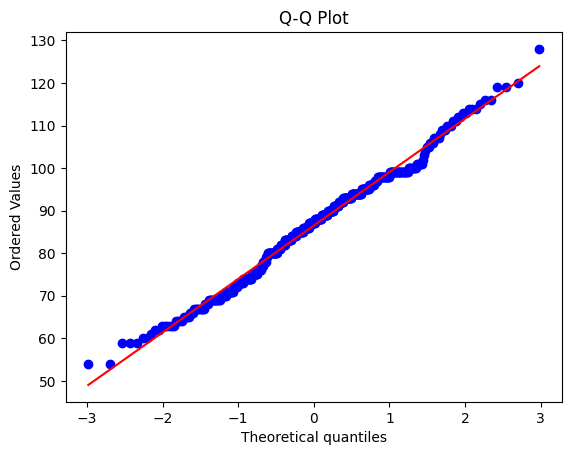

In [57]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

data = df_selected['tmil_stable']

osm,osr = stats.probplot(data, dist='norm', plot=plt)
plt.title('Q-Q Plot')
plt.show()

z-score : 표준정규분포, 평균에서 얼마나 떨어져 있는지 (표준편차 단위)


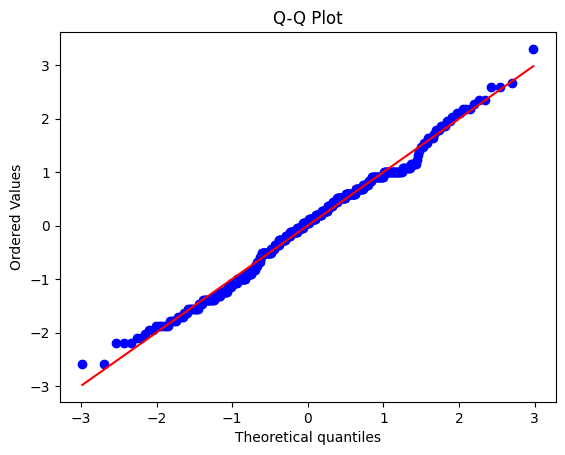

In [58]:
z_data = (df_selected['tmil_stable'] - df_selected['tmil_stable'].mean()) / df_selected['tmil_stable'].std()

stats.probplot(z_data, dist='norm', plot=plt)
plt.title('Q-Q Plot')
plt.show()

Q-Q Plot(Quantile-Quantile Plot)
데이터가 어떤 분포를 따른다고 가정할 때 실제 데이터의 분위수와 이론적 분포의 분위수를 쌍으로 매칭해서 산점도로 그림(대각선 직선-이론적 분포, 점들의 패턴-실제 데이터)


*데이터 분석에서는 통계 기법의 전제 조건을 확인해야한다. 예를 들어 t-test, ANOVA 같은 평균 비교는 "표본은 정규분포를 따른다"는 가정을 전제로 하고 회귀분석, 상관분석은 "오차가 정규분포라고 가정"한다. 이 가정이 맞지 않으면 p-value, 신뢰구간 해석이 왜곡 될 수 있기 때문에 q-q plot으로 시각적으로 확인하고 shapiro-wilk, D'Agostino, KS검정으로 수치적으로 확인해야한다.*




<양의 왜도>
점들이 위쪽으로 휘어져 직선 위에서 벗어남
오른쪽 꼬리(큰 값)가 두껍고 길다는 뜻
-> 소수의 큰 값 때문에 분포가 오른쪽으로 "튀어 있음"

<음의 왜도>
점들이 아래쪽으로 휘어짐
왼쪽 꼬리(작은 값)가 길다는 뜻
->극단적으로 작은 값들이 평균을 끌어내림

<해비 tailed>
중간 구간은 직선과 비슷하지만 끝부분에서 점들이 크게 벗어남
->극단값이 많다는 뜻 -> 분산이 커짐

*흐름*
1. 데이터가 정규분포인지 확인
2. 안 맞으면 변환을 고려
3. 표본이 충분히 크면 CLT덕분에 크게 문제 안 됨
4. 이러한 과정 후 t-test, ANOVA같은 통계 분석을 사용

Shapiro-Wilk
- 정규성을 수치로 검정

    귀무가설(H0) : 데이터는 정규분포를 따른다.

    대립가설(H1) : 정규분포가 아니다
- p-value < 0.05 -> 정규성 기각
- p-value >= 0.05 -> 정규성 유지

In [59]:
from scipy.stats import shapiro
data = (df_selected['tmil_stable'])
stat, p = shapiro(data)
print("shapiro-wilk test statistic", stat)
print("p-value", p)

shapiro-wilk test statistic 0.9906886770341438
p-value 0.003897470855427451


In [60]:
df_selected.size

5302

Shapiro-wilk검정 조건

공식 범위 : 3<= n <= 5000

scipy에서 경고 없이 계산은 됐지만, 결과 신뢰성은 낮을 수 있다.

Q-Q plot에서는 대체로 직선에 가깝게 보였지만, Shapiro 검정은 *아주 작은 차이까지 잡아냄*

표본이 많으면(>5000) *사소한 차이도 통계적으로 유의*하게 나와서 "정규성이 아니다"라고 판정되기 쉬움

| Shapiro-Wilk 검정 결과 p=0.0038로 유의수준 0.05에서 정규성 가설은 기각된다.

| 하지만 Q-Q plot상 분포는 대체로 직선에 가까워 정규성 가정이 크게 위배되었다고 보긴 어렵다.


#정규성 여부 분석
국민체력10데데이터의 안정시 트레드밀 심박수 분포를 Q-Q plot으로 확인한 결과, 데이터는 정규분포 이론선에 전반적으로 잘 부합하였다. 양 끝단에서 소폭의 이탈이 관찰되었으나 이는 실제 데이터에서 극단값(outlier)에 의해 흔히 나타나는 현상으로, 정체 분포에 큰 왜곡을 주는 수준은 아닌 것으로 판단된다.

정규성에 대한 거치적 검정을 위해 shapiro-wilk 검정을 실시한 결과, p-value = 0.0038로 유의수준 0.05보다 낮아 귀무가설(데이터가 정규분포를 따른다)은 기가되었다. 그러나 표본 크기가 5,000개 이상으로 매우 크다는 점을 고려할 때, 작은 분포 차이도 통계적으로 유의하게 검출될 가능성이 크다. 따라서 시각적 검정 결과를 종합하면, 본 데이터는 실무 분석 관정에서 *정규분포에 근사한 분포를 따른다*고 해석할 수 있다.



,0
count,1000.000000
mean,86.569033
std,2.204894
min,80.000000
25%,85.100000
50%,86.566667
75%,88.100000
max,93.200000


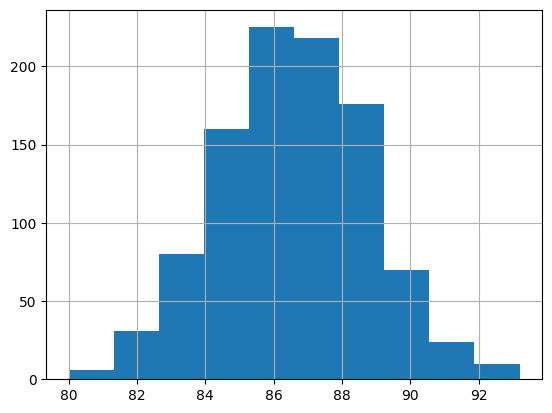

In [61]:
mom_data = df_selected['tmil_stable'].dropna()


smp_data = []
for i in range(1000) :
  s = mom_data.sample(30).mean()
  smp_data.append(s)

smp_data = pd.Series(smp_data)
smp_data.hist()
smp_data.describe()


표본평균이 모집단 평균을 얼마나 잘 대표하는가!
1. 모집단 평균
2. 표본평균의 평균
3. 둘의 차이(절댓값, 혹은 비율)

절대값 : 단순히 얼마나 떨어져 있는지 정량적으로 표현

-> 표본 크기에 직접적 영향을 받지 않음 + 데이터에 따라 차이의 해석이 달라짐

e.g) 혈압 5mmHg차이보다 키 5cm차이가 더 큼

비율 : 모집단 평균 대비 상대적 차이를 표현

-> 표본 크기가 커질수록 표본평균 분포가 좁아지므로, 비율 차이가 작아짐

e.g) 데이터의 종류와 상관없이 해석가가능

In [62]:
mom_mean = mom_data.mean()
smp_mean = smp_data.mean()

abs_diff = abs(mom_mean - smp_mean)
rel_diff = abs_diff / mom_mean

mom_mean, smp_mean, abs_diff, rel_diff

(np.float64(86.49377593360995),
 np.float64(86.56903333333332),
 np.float64(0.07525739972336964),
 np.float64(0.0008700903494042738))

SEM(표준오차)
- 모집단의 분한과 표본크기로 계산
경험적SEM(실험으로 구한 값)
-표본평균들의 분산의 제곱근

<왜 비교하느가?>
-이론적으로 *"표본 수가 많아질수록 SEM공식이 잘 맞는다"*고 말하지만, 실제 뽑은이표본이 적으면 편차가 발생한다.
- n이 작으면 경험적 SEM이 들쭉날쭉 -> 표본 추출의 불안정성 체감
- n이 크지면 경험적 SEM이 이론값에 점점 가까워짐 -> "큰 수의 법칙"체험

<요약>
| SEM이론 vs 경험 비교는 통계공식이 실제 데이터에서도 유효한지 검정하고, 표본 크기에 따른 안정성을 체감하기 위함


📌 기본 개념

- 분산(variance)나 표준편차(std)를 계산할 때

- 모집단 전체 데이터를 가지고 계산 → 분모를 n 으로 나눔

- 표본 데이터를 가지고 모집단을 추정할 때 → 분모를 n-1 로 나눔 (자유도 보정)

⸻

📌 Python / Numpy / Pandas 에서의 ddof

- np.std(x, ddof=0) → 분모가 n. 모집단 표준편차

- np.std(x, ddof=1) → 분모가 n-1. 표본 표준편차

즉,

- ddof=0: 데이터 전체가 모집단이라고 가정 (default)

- ddof=1: 데이터가 표본이라고 가정 → 더 unbiased (불편추정량)


In [65]:
 n = 30
 sem = mom_data.std(ddof=1)/np.sqrt(30)
 smp_sem = smp_data.std(ddof=1)

 sem, smp_sem

(np.float64(2.2938116351584776), 2.204894394639737)

In [66]:
abs = sem-smp_sem
rel = abs/sem

abs, rel

(np.float64(0.08891724051874084), np.float64(0.03876396786722098))

<요약>
*"이론적 표본오차(SEM=2.29)와 경험적 표본오차(smp_SEM=2.20)의 차이가 매우 작아, 본 표본의 모집단 평균을 안정적으로 대표한다고 해석할 수 있다"*

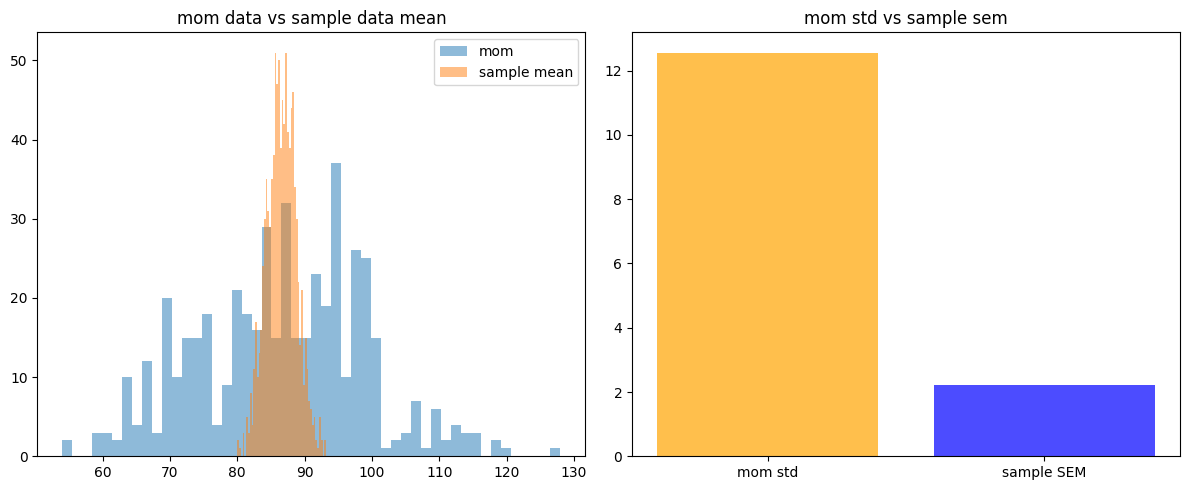

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(mom_data, bins=50, alpha=0.5, label='mom')
axes[0].hist(smp_data, bins=50, alpha=0.5, label='sample mean')
axes[0].legend()
axes[0].set_title("mom data vs sample data mean")

axes[1].bar(["mom std", "sample SEM"],
            [mom_data.std(ddof=1), smp_data.std(ddof=1)],
            color=["orange", "blue"], alpha=0.7)
axes[1].set_title("mom std vs sample sem")

plt.tight_layout()
plt.show()

<요약>
1. 히스토그램(모집단 vs 표본평균)
- 모집단 데이터(mom)는 원부의 분포라 퍼져 있음
- 표본평균(sample mean)은 모집단보다 흩어짐이 작고 중앙에 집중됨

-> 중심극한정리에 따라 표본평균은 모집단 평균을 잘 대표함

2. 막대 그래프(모집단 표준편차 vs 표준오차)
- 모집단 표준편차(mom std) > 표본오차(sample SEM)
- 평균을 사용하면 개별 데이터보다 변동성이 줄어 안정ㄱ인 대표값을 얻을 수 있음

*표본 평균은 모집단 평균을 안정적으로 추정할 수 있는 좋은 추정량*